In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense

# Charger les données
df_normal = pd.read_csv('split_by_clusters\cluster_0.csv')  # Données normales
df_anomaly = pd.read_csv('clusters_Anomaly\cluster_0_anomaly.csv')  # Données avec anomalies

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\asus\AppData\Local\Temp\ipykernel_34312\1676813545.py:12: SyntaxWarning: invalid escape sequence '\c'
  df_normal = pd.read_csv('split_by_clusters\cluster_0.csv')  # Données normales
C:\Users\asus\AppData\Local\Temp\ipykernel_34312\1676813545.py:13: SyntaxWarning: invalid escape sequence '\c'
  df_anomaly = pd.read_csv('clusters_Anomaly\cluster_0_anomaly.csv')  # Données avec anomalies


In [3]:
df_anomaly

,user_number,datetime,Consommation,cluster,anomalie,type
0,0_1,2016-01-03 01:19:43,0,0,0,NaN
1,0_1,2016-01-03 02:19:43,0,0,0,NaN
2,0_1,2016-01-03 03:19:43,0,0,0,NaN
3,0_1,2016-01-03 04:19:43,0,0,0,NaN
4,0_1,2016-01-03 05:39:54,0,0,0,NaN
...,...,...,...,...,...,...
192678,0_60,2017-12-02 19:27:55,1,0,0,NaN
192679,0_60,2017-12-02 20:27:55,0,0,0,NaN
192680,0_60,2017-12-02 21:27:55,0,0,0,NaN
192681,0_60,2017-12-02 22:27:55,0,0,0,NaN


Epoch 1/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 6s 700us/step - loss: 4.4665e-04 - val_loss: 6.2544e-07
Epoch 2/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step - loss: 2.3300e-06 - val_loss: 5.5499e-07
Epoch 3/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 703us/step - loss: 3.4413e-06 - val_loss: 4.9441e-07
Epoch 4/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 656us/step - loss: 2.0210e-06 - val_loss: 4.3969e-07
Epoch 5/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 674us/step - loss: 2.4639e-06 - val_loss: 4.2333e-07
Epoch 6/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 655us/step - loss: 1.9318e-06 - val_loss: 3.0741e-07
Epoch 7/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 636us/step - loss: 2.2146e-06 - val_loss: 2.6630e-07
Epoch 8/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 632us/step - loss: 1.9104e-06 - val_loss: 1.8725e-07
Epoch 9/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 659us/step - loss: 4.9382e-07 - val_loss: 2.5740e-07
Epoch 10/50
7267/7267 ━━━━━━━━━━━━━━━━━━━━ 5s 618us/step - loss: 1.0437e-06 - val_loss: 9.7087e-08
Epoch 11/50
7267/72

Modèle autoencodeur sauvegardé
6022/6022 ━━━━━━━━━━━━━━━━━━━━ 3s 461us/step
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    191326
           1       0.10      0.69      0.17      1357

    accuracy                           0.95    192683
   macro avg       0.55      0.82      0.57    192683
weighted avg       0.99      0.95      0.97    192683



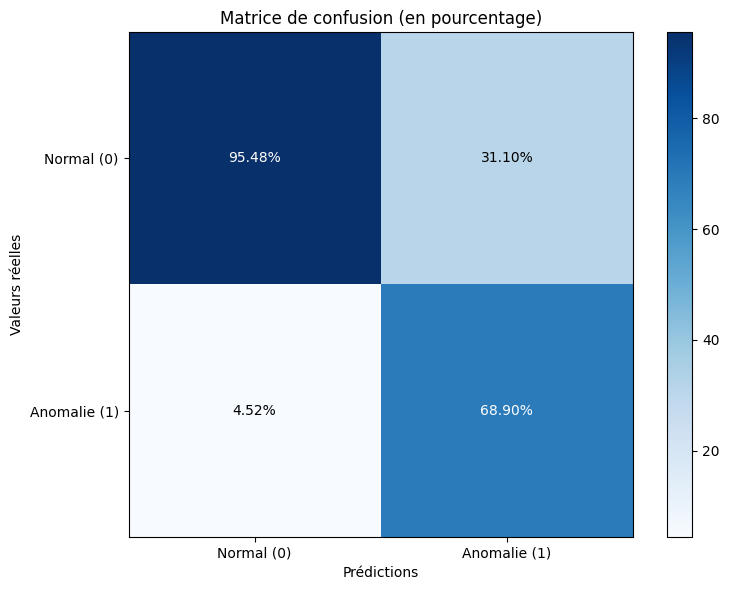

In [5]:


# Normalisation des données
scaler = MinMaxScaler()
data_normal_scaled = scaler.fit_transform(df_normal[['Consommation']])  # Utiliser 'Consommation' pour l'exemple
data_anomaly_scaled = scaler.transform(df_anomaly[['Consommation']])

# Diviser les données normales en entraînement et validation
X_train, X_val = train_test_split(data_normal_scaled, test_size=0.2, random_state=42)

# Définir l'architecture de l'autoencodeur
input_dim = X_train.shape[1]  # Dimension des données d'entrée
encoding_dim = 8  # Dimension de l'espace latent

# Définir les couches de l'autoencodeur
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Créer le modèle autoencodeur
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiler le modèle
autoencoder.compile(optimizer='adam', loss='mse')

# Entraîner l'autoencodeur sur les données normales
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val), shuffle=True)

# Sauvegarder le modèle
autoencoder.save('autoencoder_normal_model.h5')
print("Modèle autoencodeur sauvegardé")

# Calcul des erreurs de reconstruction sur les données avec anomalies
reconstructed_anomalies = autoencoder.predict(data_anomaly_scaled)
reconstruction_error = np.mean(np.power(data_anomaly_scaled - reconstructed_anomalies, 2), axis=1)

# Définir un seuil d'anomalie basé sur l'erreur de reconstruction
threshold = np.percentile(reconstruction_error, 95)  # Par exemple, seuil à 95e percentile

# Classifier comme anomalie si l'erreur dépasse le seuil
y_pred = (reconstruction_error > threshold).astype(int)

# Obtenir les labels réels des anomalies
y_true = df_anomaly['anomalie'].values  # Cette colonne doit être présente dans df_anomaly, avec 0 ou 1 pour normal/anomalie

# Calculer la matrice de confusion et le rapport de classification
print("Rapport de classification :")
print(classification_report(y_true, y_pred))

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Normaliser la matrice de confusion pour obtenir des pourcentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percentage=cm_percentage.T

# Afficher la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_percentage, interpolation='nearest', cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Normal (0)', 'Anomalie (1)'],
       yticklabels=['Normal (0)', 'Anomalie (1)'],
       ylabel='Valeurs réelles',
       xlabel='Prédictions')

# Ajouter les pourcentages dans les cases
fmt = '.2f'
thresh = cm_percentage.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_percentage[i, j], fmt) + '%',
                ha="center", va="center",
                color="white" if cm_percentage[i, j] > thresh else "black")

plt.title("Matrice de confusion (en pourcentage)")
plt.tight_layout()
plt.show()
